# Group Project Proposal: Group 24

### Background Info:  
Work ethic is one of the driving factors in both workplace and academic productivity. Students with strong work ethic are more likely to improve academically. Also, such students are more likely to be desired by employers after graduation since it is essential to assess whether you can fulfill your responsibility. According to research, work ethic for students is linked to improved performance and a greater likelihood for career advancement in the future (Contributor, 2021). This improved performance can be shown through scores on examinations. 

We will be looking into a dataset that shows students’ knowledge status alongside a couple of attributes that relate to the students work ethic. Our goal is to try to classify a student’s knowledge status when given only 2 attributes in the dataset. Our classifier will find the nearest neighbours close to our point in the data, find the majority of the user knowledge class among it, and use that to classify our user’s knowledge.  

Initially, we thought we would be able to classify the knowledge level based on the STG (study time for goal object) and SCG (degree of repitition for goal object), but we found that those two predictors had no significant relationship, leading to the model not having sufficient accuracy. So, we decided to classify the knowledge level of a user based on their exam performance.

#### Dataset: 
The dataset we will be using is the User Knowledge Modeling Data Set. This dataset shows the knowledge status of ~400 students on the subject of Electrical DC Machines, including the degree to how they study. Each observation represents a single user, showing the values of their attributes.

#### Question (Classification): 
Can we predict the UNS level (The knowledge level of the user) if we are given the LPR (exam performance of user for realated objects with goal object) and PEG (exam performance of user for goal objects)?


##### Relevant columns  in the dataset:
* STG (The degree of study time for goal object materials)
* SCG (The degree of repetition number of user for goal object materials)
* STR (The degree of study time of user for related objects with goal object)
* LPR (The exam performance of user for related objects with goal object)
* PEG (The exam performance of user for goal objects)
* UNS (The knowledge level of user)



### Preliminary Exploratory Data Analysis:

In [2]:
library(tidyverse)
library(tidymodels)
library(readxl)
library(cowplot)
library(GGally)
options(repr.matrix.rows=6)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

#### Reading the Data
In this section, we downloaded the data from the internet in a reproducible way (by setting the seed). Then, we read it into our Jupyter notebook. The excel file was split into three sheets, but we will be looking at two of them: training data sheet and testing data sheet.

In [3]:
set.seed(2020)
user_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
download.file(user_url, "Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls")
training_data <- read_excel("Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls", sheet = 2)
testing_data <- read_excel("Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls", sheet = 3)
head(training_data, 10)
head(testing_data, 10)

New names:
* `` -> ...7
* `` -> ...8

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)
0.10,0.10,0.43,0.29,0.56,Middle,NA,NA,NA
0.15,0.02,0.34,0.40,0.01,very_low,NA,NA,NA
0.20,0.14,0.35,0.72,0.25,Low,NA,NA,NA


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.05,0.05,0.55,0.60,0.14,Low,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.08,0.18,0.63,0.60,0.85,High,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.20,0.20,0.68,0.67,0.85,High,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.22,0.22,0.90,0.30,0.90,High,NA,NA,PEG (The exam performance of user for goal objects)
0.14,0.14,0.70,0.50,0.30,Low,NA,NA,UNS (The knowledge level of user)
0.16,0.16,0.80,0.50,0.50,Middle,NA,NA,NA
0.12,0.12,0.75,0.68,0.15,Low,NA,NA,NA
0.20,0.20,0.88,0.77,0.80,High,NA,NA,NA


#### Tidying the Data
Now, we must tidy the data into six columns with one observation per row and make sure the Knowledge Level is a factor in order to continue building our classification model.

In [4]:
set.seed(2020)
training_tidy <- training_data %>%
                    select(STG, SCG, STR, LPR, PEG, UNS) %>%
                    mutate(UNS = as_factor(UNS))
testing_tidy <- testing_data %>%
                    select(STG, SCG, STR, LPR, PEG, UNS) %>%
                    mutate(UNS = recode_factor(UNS, "Very Low" = "very_low", "Low" = "Low", "High" = "High", "Middle" = "Middle"))%>%
                    mutate(UNS = as_factor(UNS))
training_summary <- training_tidy %>%
                        summarise(avg_STG = mean(STG), 
                                  avg_SCG = mean(SCG), 
                                  avg_STR = mean(STR), 
                                  avg_LPR = mean(LPR), 
                                  avg_PEG = mean(PEG))
head(training_tidy)
head(testing_tidy)
training_summary

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,very_low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


avg_STG,avg_SCG,avg_STR,avg_LPR,avg_PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


#### Visualizing the Data
Here, we will do a preliminary visualization of the data. First we will do a ggpairs plot to explore the relationship between different variables and discover the two variables with the highest ability to classify UNS are LPR and PEG. We then will do an exploratory plot to see the relationship between LPR and PEG with respect to their classifications. Lastly, as further investigation, we will graph the average of each value in a bar graph to see how the values are distributed throughout the dataset.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



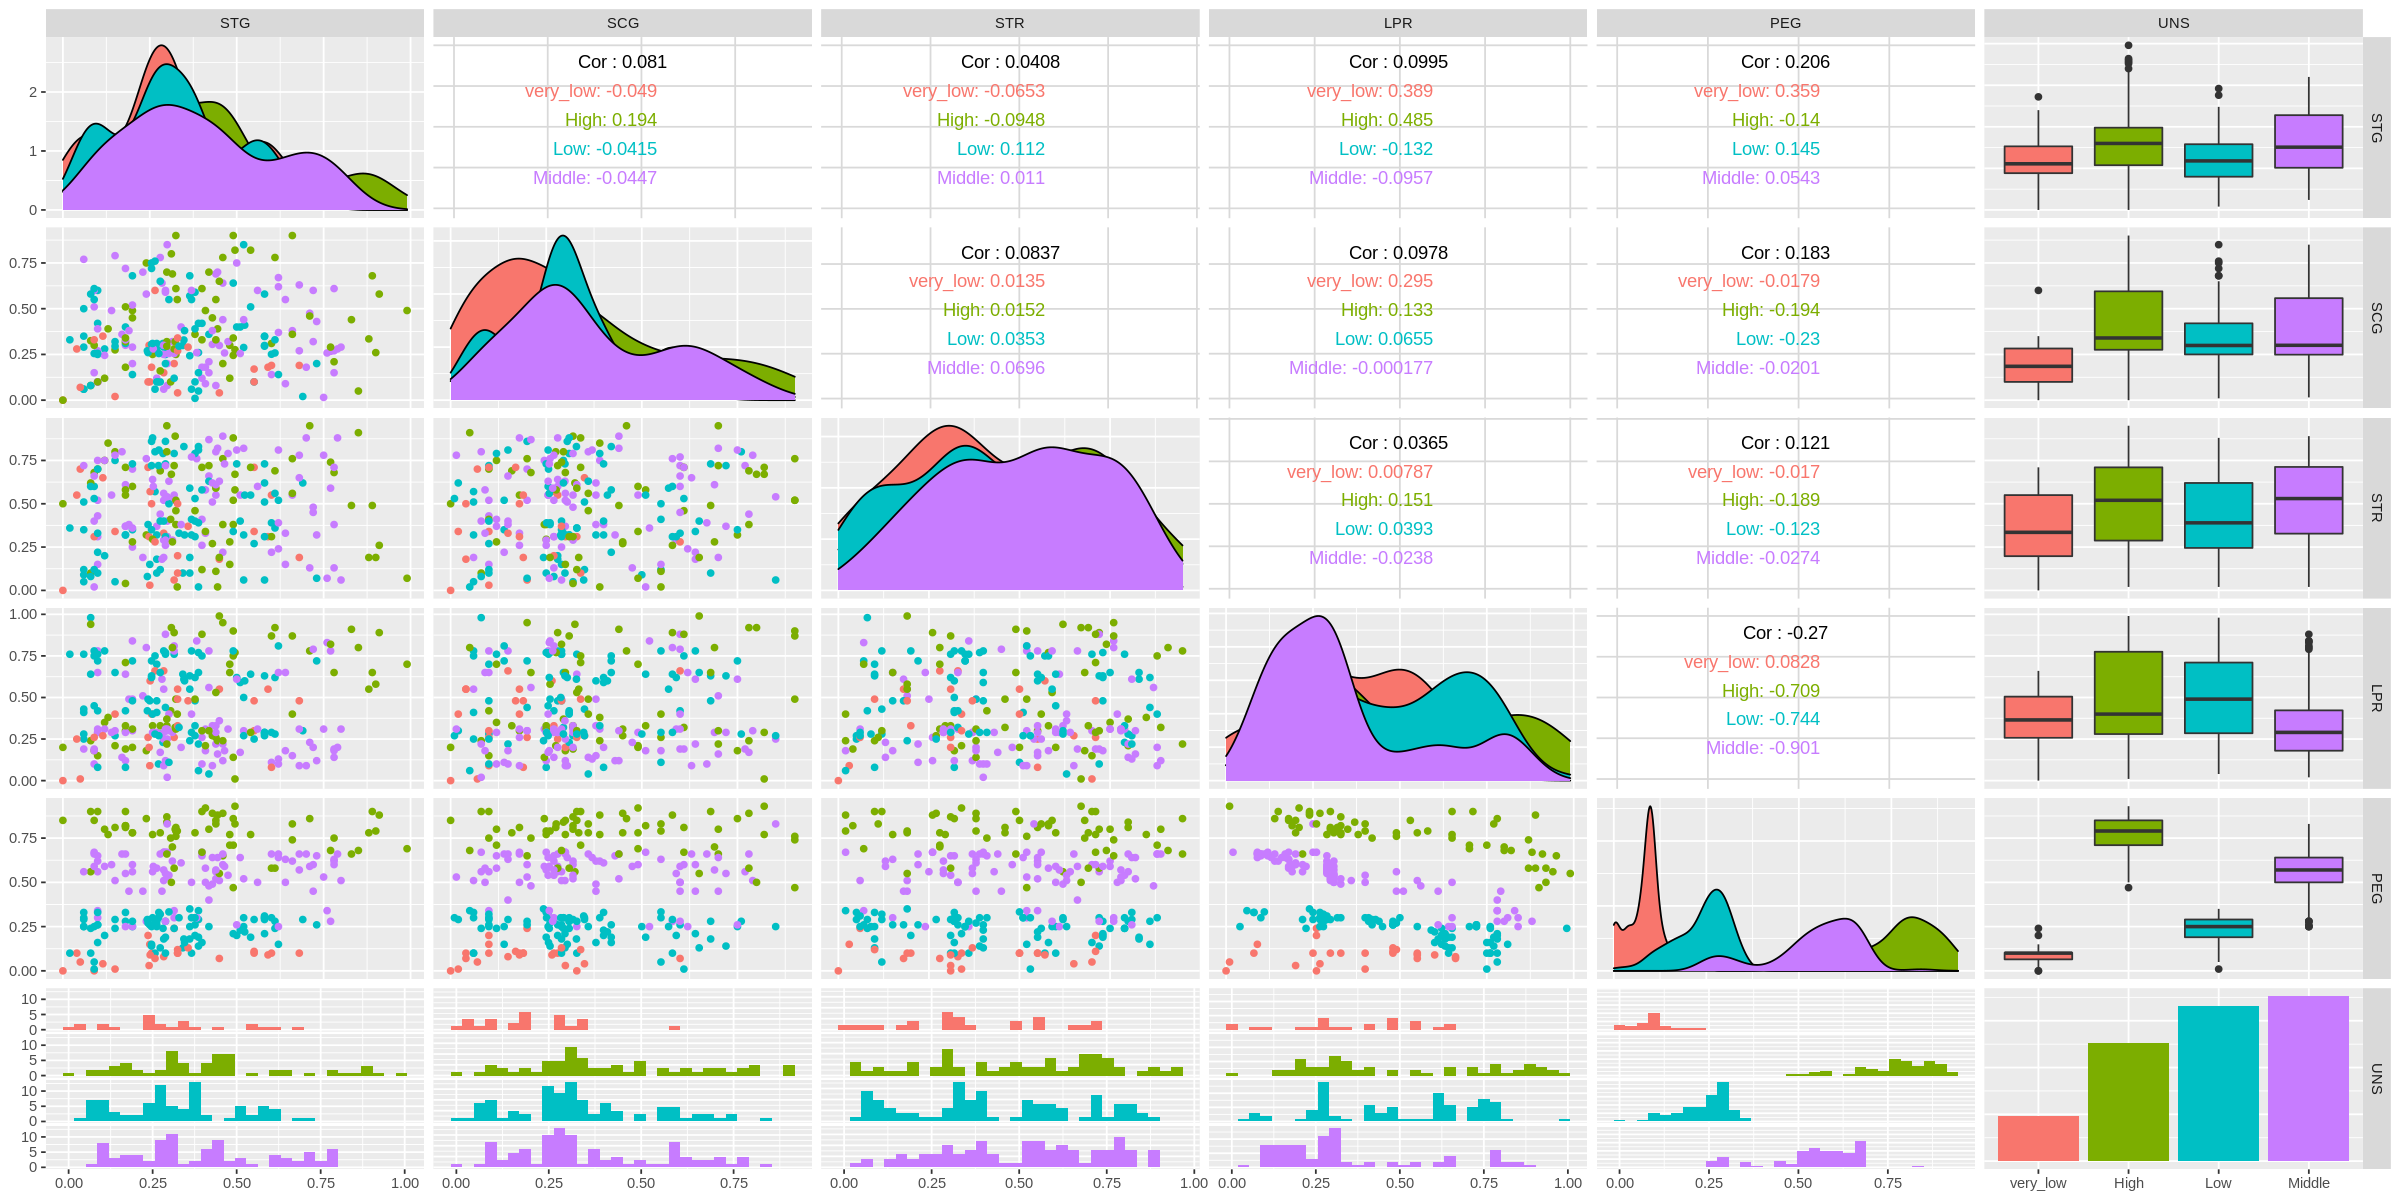

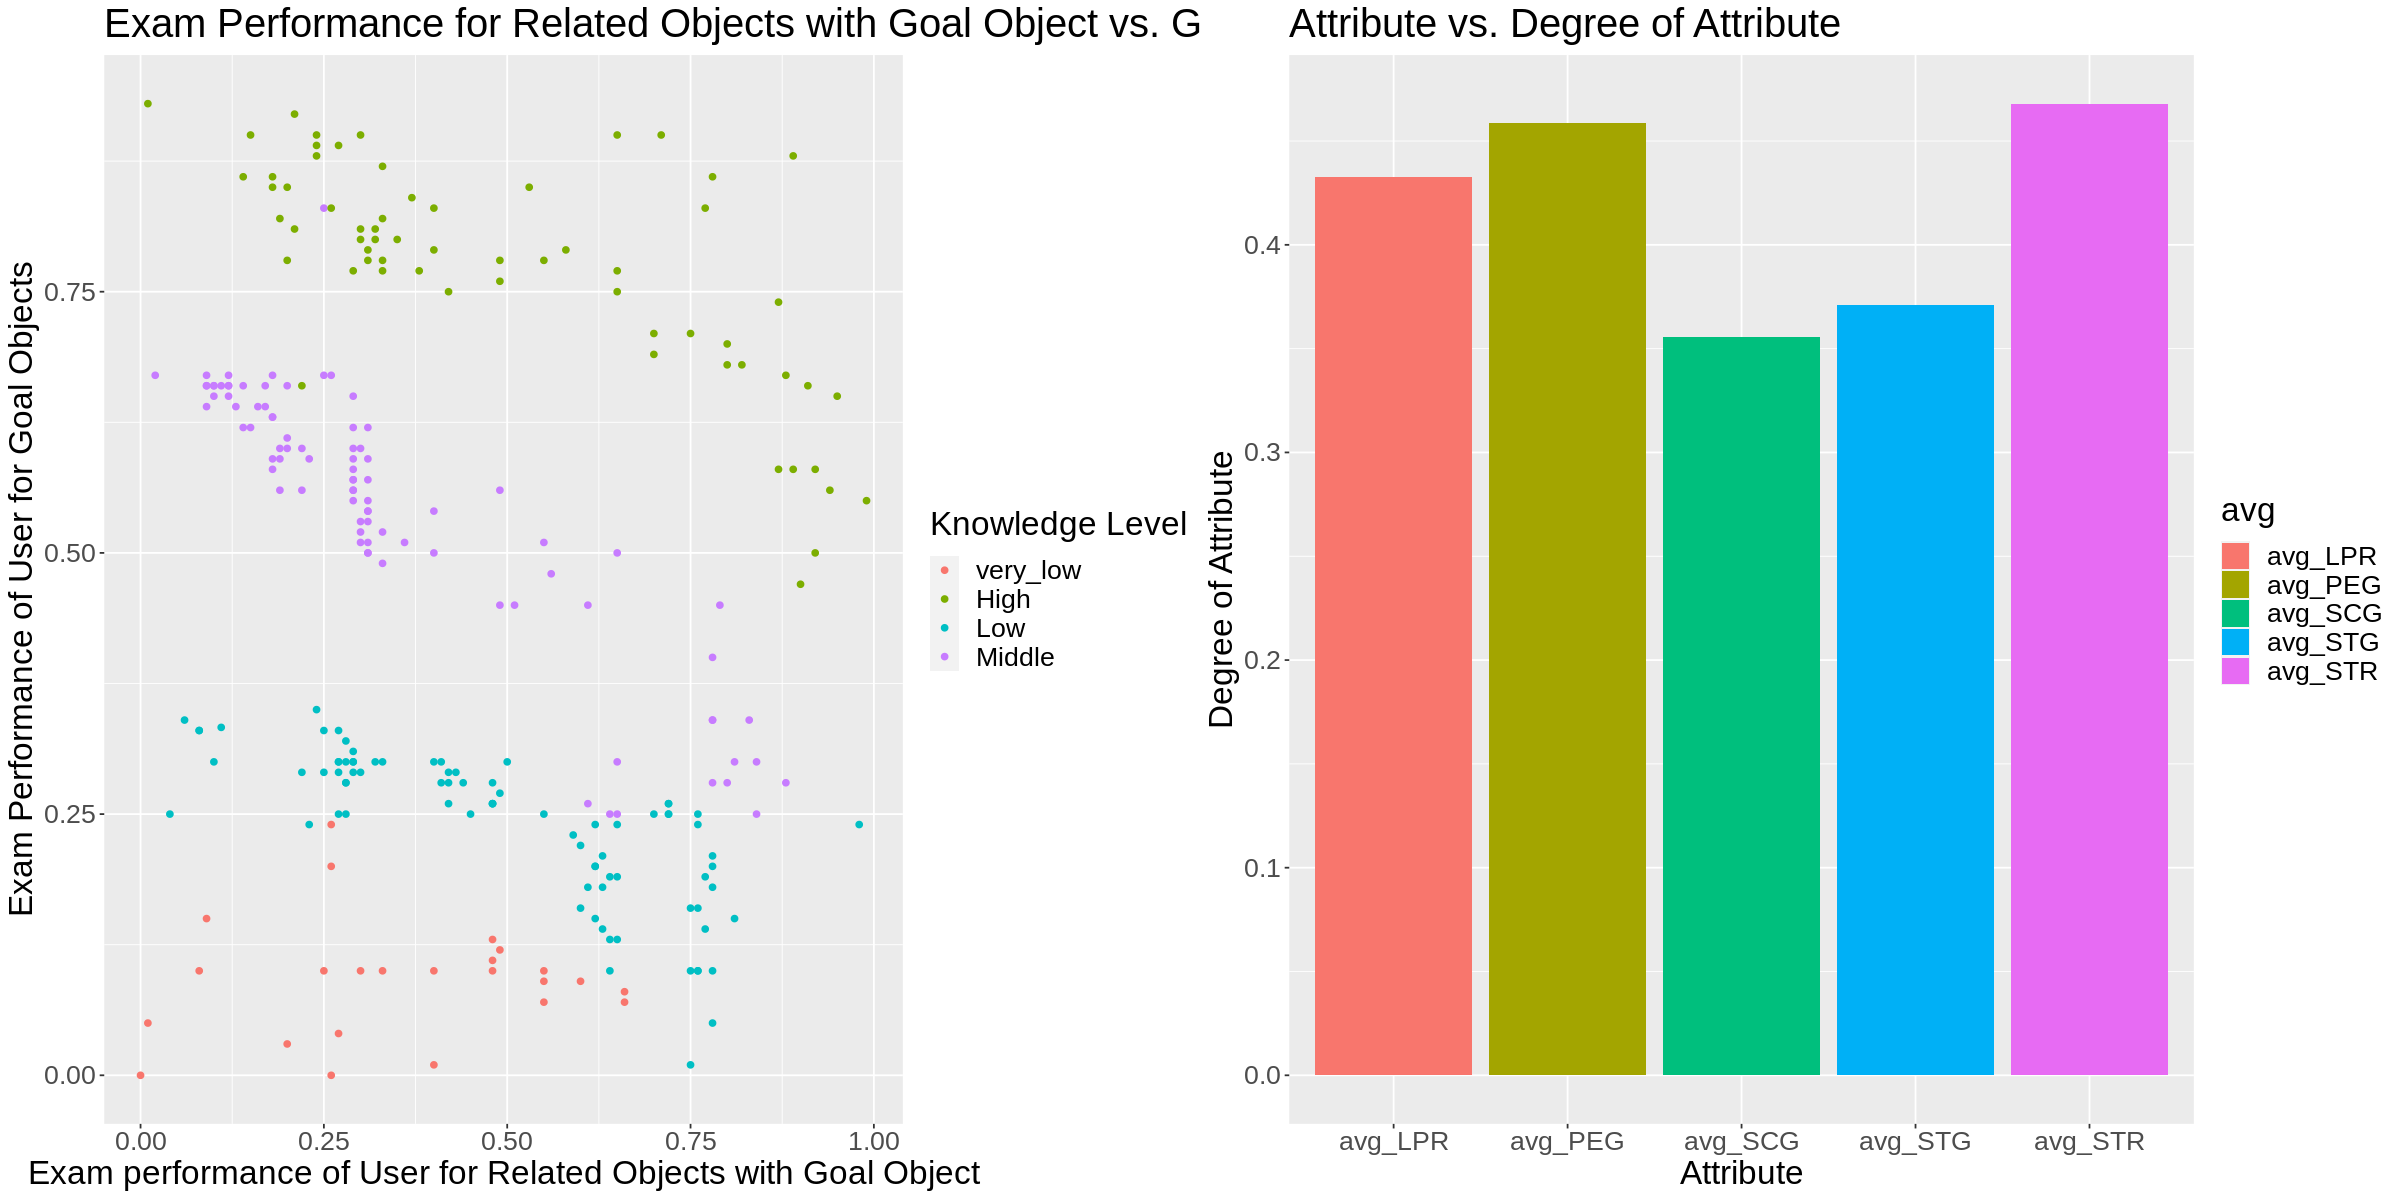

In [5]:
options(repr.plot.width=20)
options(repr.plot.height=10)
#draw a scatter plot to visualize the relationship between the LPR and PEG,with UNS as target variable
spread_plot <- training_tidy %>%
                    ggplot(aes(x = LPR, y = PEG, colour = UNS)) +
                        geom_point() +
                        labs(title = "Exam Performance for Related Objects with Goal Object vs. Goal Object", x = "Exam performance of User for Related Objects with Goal Object", y = "Exam Performance of User for Goal Objects", colour = "Knowledge Level") +
                        theme(text = element_text(size = 20))
training_long <- training_summary %>%
                    pivot_longer(cols = 5:1, names_to = "avg", values_to = "value")
pairs <-ggpairs(training_tidy,mapping=aes(color=UNS)) 
pairs
averages_plot <- training_long %>%
                    ggplot(aes(avg, value, fill = avg)) +
                    geom_col() +
                    labs(x = "Attribute", y = "Degree of Attribute", title = "Attribute vs. Degree of Attribute") +
                    theme(text = element_text(size=20))
plot_grid(spread_plot, averages_plot)

The plot on the left, shows strong correlation between knowledge level, exam performance for goal related objects and exam performace on goal objects. On the right, we can see the average level of each attribute in the data set.

### Methods:
We will use classification to predict UNS based on two variables: LPR and PEG

First, we read in the data which was already split into training and testing sections. Second, we made the data tidy and selected 3 columns. Fourth, we standardized the data in LPR and PEG. Below, we will create a recipe and perform 5-fold cross-validation, which includes: creating a new knn model specification and a workflow combining the previous recipe and new model. Metrics will be collected and plotted as Accuracy vs K to find the best K which we will then train the training data with. Finally, we will test accuracy with the testing data and visualized our testing data.


Visualization: generate scatter plot of LPR vs PEG where different color of points indicate UNS and background color indicates the decision of classifier.



### Building the Classifier:

Here we continued the KNN-classification, by tuning, evaluating, and finding the best K value for our classifier.

In [6]:
set.seed(2020)
#perform cross validation to decide best k
#use k-nearest algorithm to set spec and recipe
uns_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
       set_engine("kknn") %>%
       set_mode("classification") 

uns_recipe <- recipe(UNS ~ LPR + PEG, data = training_tidy) %>%
       step_scale(all_predictors()) %>%
       step_center(all_predictors())

In [7]:
set.seed(2020)
#perform 5-fold cross-validation
uns_vfold <-vfold_cv(training_tidy, v = 5, strata = UNS)

uns_workflow <- workflow() %>%
                    add_recipe(uns_recipe) %>%
                    add_model(uns_spec)

In [8]:
set.seed(2020)
#create our data analysis workflow and run cross-validation on each train/validation split.
gridvals <- tibble(neighbors = seq(1,20))       
#collect accuracy for each k from 1 to 10
uns_results <- uns_workflow %>%
                   tune_grid(resamples = uns_vfold, grid = gridvals) %>%
                   collect_metrics() %>%
                   filter(.metric == "accuracy")  
uns_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9496898,5,0.015853025,Model01
2,accuracy,multiclass,0.9496898,5,0.015853025,Model02
3,accuracy,multiclass,0.9535360,5,0.009905954,Model03
4,accuracy,multiclass,0.9535360,5,0.009905954,Model04
5,accuracy,multiclass,0.9573095,5,0.009655895,Model05
6,accuracy,multiclass,0.9573095,5,0.009655895,Model06
7,accuracy,multiclass,0.9456174,5,0.011461472,Model07
8,accuracy,multiclass,0.9456174,5,0.011461472,Model08
9,accuracy,multiclass,0.9377743,5,0.016946654,Model09


[1] 5

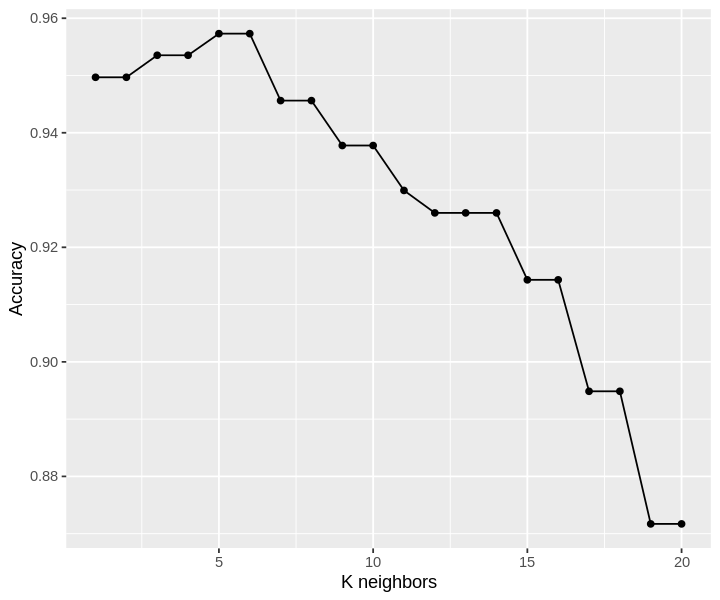

In [9]:
options(repr.plot.height = 5, repr.plot.width = 6)
#visualize accuracy vs k to choose the best k with highest accuracy
cross_val_plot <- uns_results %>%
                    ggplot(aes(x = neighbors, y = mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "K neighbors", y = "Accuracy")

cross_val_plot

highest_acc <- uns_results %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                pull(neighbors)

highest_acc

#chose k = 5, as it provides the highest accuracy


In [10]:
uns_spec_k <- nearest_neighbor(weight_func = "rectangular", neighbors = highest_acc) %>% 
       set_engine("kknn") %>%
       set_mode("classification")

uns_fit <- workflow() %>%
             add_recipe(uns_recipe) %>%
             add_model(uns_spec_k) %>%
            fit(data = training_tidy)
uns_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~highest_acc,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.04263566
Best kernel: rectangular
Best k: 5

In [11]:
set.seed(2020)
#evaluate accuracy of our model with testing data
uns_pred <- predict(uns_fit, testing_tidy) %>%
                    bind_cols(testing_tidy)
uns_pred$.pred_class  <- factor(uns_pred$.pred_class, levels = c("very_low", "Low", "High", "Middle"))
# in the line above we had to fix the names of the levels in the testing set in order to make them comaparable
# because they were spelt differently than the training set
# For example, the level was "Very Low" in the test set, but it was named "very_low" in the training set, therefore levels weren't comparable


uns_metrics <- uns_pred %>%
                metrics(truth = UNS, estimate = .pred_class) %>%
                filter(.metric == "accuracy")

uns_conf_mat <- uns_pred %>%
                conf_mat(truth = UNS, estimate = .pred_class)

uns_metrics
uns_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9724138


          Truth
Prediction very_low Low High Middle
  very_low       24   0    0      0
  Low             2  45    0      1
  High            0   0   39      0
  Middle          0   1    0     33

### Visualization

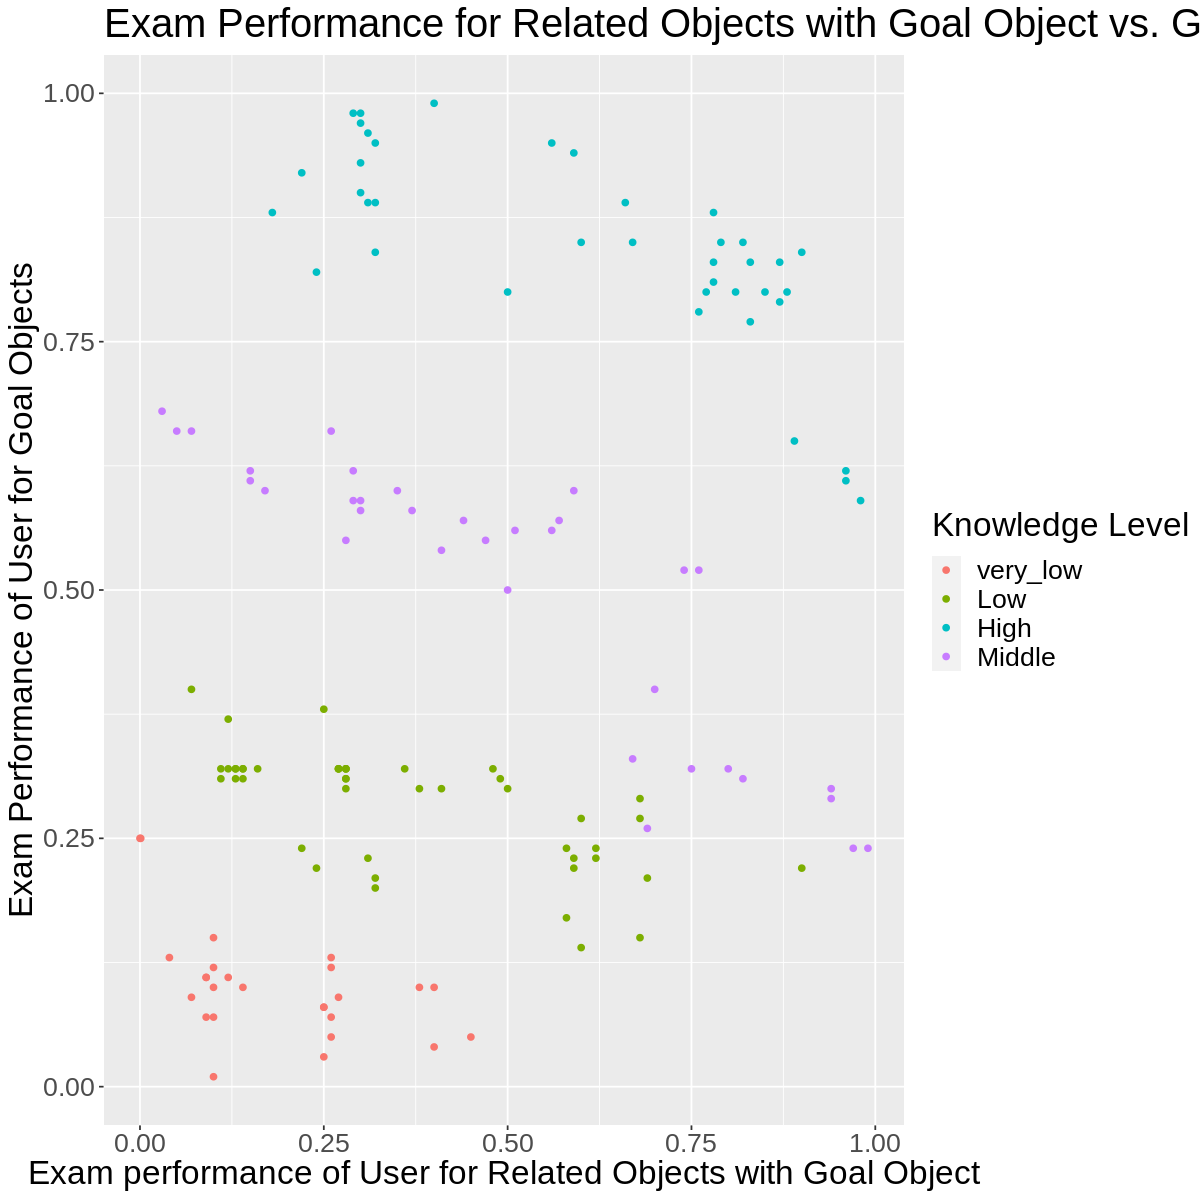

In [13]:
test_spread_plot <- testing_tidy %>%
                    ggplot(aes(x = LPR, y = PEG, colour = UNS)) +
                        geom_point() +
                        labs(title = "Exam Performance for Related Objects with Goal Object vs. Goal Object", x = "Exam performance of User for Related Objects with Goal Object", y = "Exam Performance of User for Goal Objects", colour = "Knowledge Level") +
                        theme(text = element_text(size = 20))
test_spread_plot

### Discussion:

At the proposal stage we had planned to use SCG and STG as our predictors, but after evaluating the accuracy of our k-nn model, we noticed that even with the best k, the accuracy remained low. So, we decided to change our predictors. Here are two basis we rely on when choosing: First, the ggpair plot shown above. Second, the histogram shown below. From the ggpair plot we can see the the distribution of UNS in scatter plot of SCG vs STG does not show a pattern of grouping, but LPR vs PEG does, which indicates we may need to focus on LPR and PEG. Secondly, after using the below histograms to visualize the distributions these four predictors, if we can see difference in distributions for each category, then that could indicate that the predictor will be useful in predicting the target variable. The histogram with PEG as x-axis shows a apparent difference in UNS distribution while neither SCG nor STG does. Although LPR does not show very obvious difference in distribution, when taken into consideration together with PEG in scatter plot, they still work well. So, we decided to use LPR and PEG to classify UNS.

We expected to find that the LPR (exam score for related objects) and PEG (exam score for goal objects) would be able to accurately predict the knowledge level of the user. Through our analysis of the User Knowledge data, we can prove that a higher exam score on goal related objects and goal objects can classify the knowledge level of a user with 97% accuracy. A trend that we noticed was that if the LPR and PEG were high, then the UNS level was also pretty high.  

This is exactly what we expected to find as exams are traditionally used to test for knowledge. According to Gary Smith in his study on formative assesment scores in relation to exams, exams prove "mastery of key concepts" and the "ability to apply content to new situations" (Smith, 2007), which corresponds with the Merriam-Webster definition of knowledge: the "information, understanding, or skill that you get from experience or education" (Merriam-Webster (n.d.). Therefore, the higher the scores of a student's exam, the higher the level of knowledge should be, and vice versa. 

This proves the effectiveness of examinations and their ability to classify a students "information, understanding, or skill" level with course material. Considering, we were able to classify students with 97% accuracy, exams are an effective and proficient method for testing students knowledge.

The type and method of this exam were not explained in the original dataset. This could lead to future questions such as: Which type of examinations are the best for which subjects? And, what is the ideal number of questions to accurately test knowledge level? 








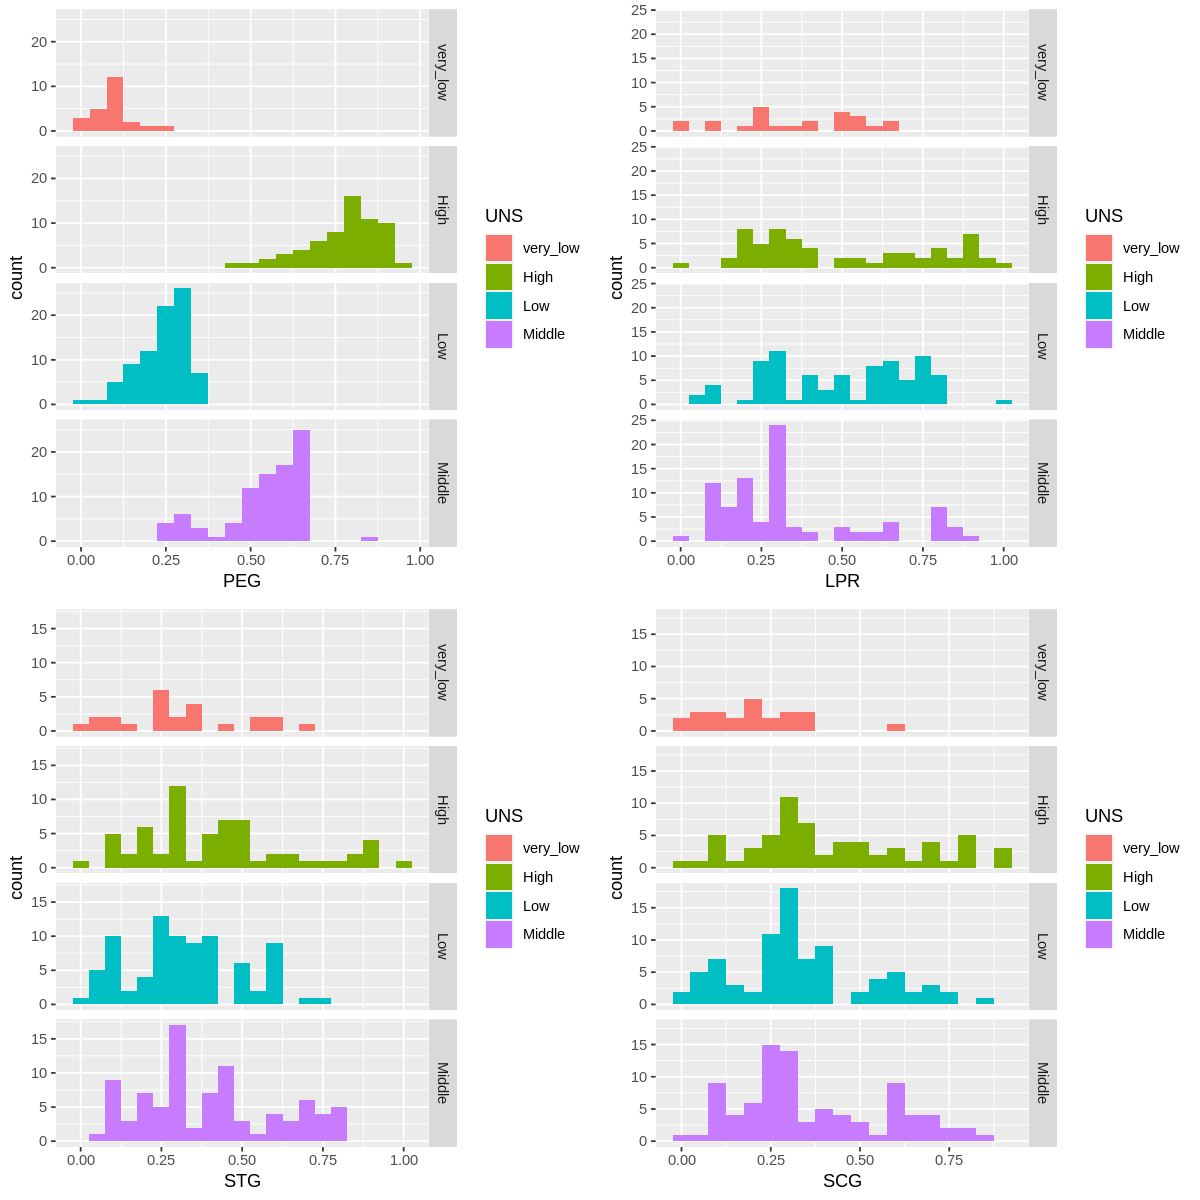

In [12]:
options(repr.plot.width=10)
options(repr.plot.height=10)
spread_plt_PEG <- ggplot(training_tidy, aes(x = PEG, fill = UNS)) +
  geom_histogram(binwidth = 0.05) +
  facet_grid(rows = vars(UNS))
spread_plt_LPR <- ggplot(training_tidy, aes(x = LPR, fill = UNS)) +
  geom_histogram(binwidth = 0.05) +
  facet_grid(rows = vars(UNS))
spread_plt_STG <- ggplot(training_tidy, aes(x = STG, fill = UNS)) +
  geom_histogram(binwidth = 0.05) +
  facet_grid(rows = vars(UNS))
spread_plt_SCG <- ggplot(training_tidy, aes(x = SCG, fill = UNS)) +
  geom_histogram(binwidth = 0.05) +
  facet_grid(rows = vars(UNS))

plot_grid(spread_plt_PEG, spread_plt_LPR, spread_plt_STG, spread_plt_SCG)

#### References

Contributor, C. (2021, April 13). Negative work ethic definition. Small Business - Chron.com. Retrieved December 7, 2021, from https://smallbusiness.chron.com/negative-work-ethic-definition-10235.html. 

Kahraman, H. T., Colak, I., &amp; Sagiroglu, S. (2009, October). User Knowledge Modeling Data Set. Retrieved November 2021, from https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling. 

Merriam-Webster. (n.d.). Knowledge definition &amp; meaning. Merriam-Webster. Retrieved December 7, 2021, from https://www.merriam-webster.com/dictionary/knowledge. 

Smith, G. (2007). How Does Student Performance on Formative Assessments Relate to Learning Assessed by Exams? Journal of College Science Teaching, 36(7), 28–34. http://www.jstor.org/stable/42992501



